<a href="https://colab.research.google.com/github/duartejr/challenge_data_science_alura_voz/blob/main/semana_2_analise_variavel_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 2 do Challenge

## Objetivo: Analisar a variável target: Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

dados = pd.read_csv('dados_clientes_alura_voz.csv')

### Visualizar a distribuição da variável target: **Churn**

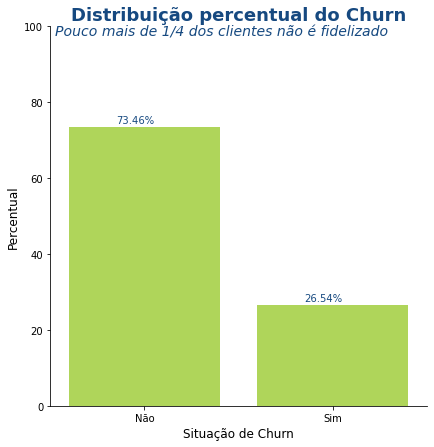

In [2]:
churn_rate = dados.churn.value_counts(normalize=True)*100
churn_rate = churn_rate.to_frame().reset_index()
churn_rate.columns = ['Situação de Churn', 'Percentual']

fig = sns.catplot(data=churn_rate, x='Situação de Churn', y='Percentual', kind='bar', color='#b7ea45', height=6)
fig.ax.set_ylim(0, 100)
fig.set_xlabels(fontsize=12)
fig.set_ylabels(fontsize=12)

for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + .25
    txt_y = p.get_height() + 1
    fig.ax.text(txt_x,txt_y,txt, color='#164980')

plt.title('Distribuição percentual do Churn', fontsize=18, color='#164980', weight='bold')
plt.suptitle('Pouco mais de 1/4 dos clientes não é fidelizado', fontsize=14, color='#164980', style='italic')
fig.set(xticklabels=['Não', 'Sim']);

### Criar visualizações relevantes em relação ao Churn

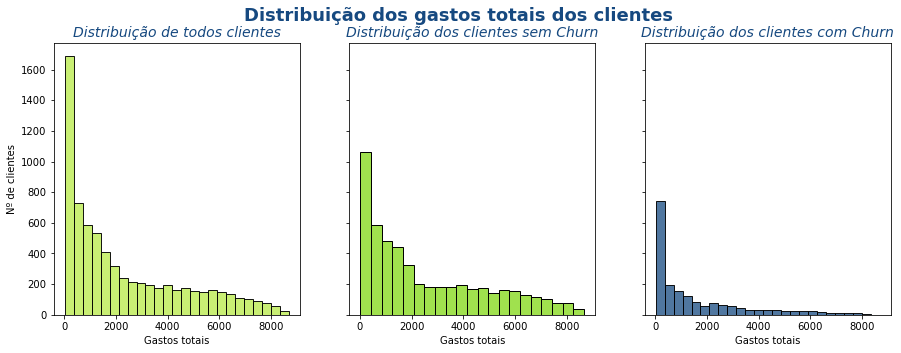

In [3]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5));
sns.histplot(data=dados, x='gastos_totais', ax=axes[0], color='#b7ea45')
axes[0].set_title('Distribuição de todos clientes', fontsize=14, color='#164980', style='italic')
axes[0].set_xlabel('Gastos totais')
axes[0].set_ylabel('Nº de clientes')

sns.histplot(data=dados.query('churn == 0'), x='gastos_totais', ax=axes[1], color='#81d712')
axes[1].set_title('Distribuição dos clientes sem Churn', fontsize=14, color='#164980', style='italic')
axes[1].set_xlabel('Gastos totais')

sns.histplot(data=dados.query('churn == 1'), x='gastos_totais', ax=axes[2], color='#164980')
axes[2].set_title('Distribuição dos clientes com Churn', fontsize=14, color='#164980', style='italic')
axes[2].set_xlabel('Gastos totais')

fig.suptitle('Distribuição dos gastos totais dos clientes', fontsize=18, color='#164980', weight='bold');

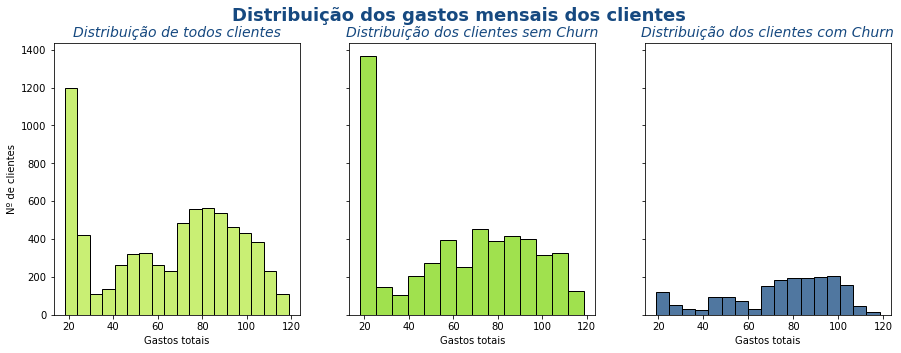

In [4]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5));
sns.histplot(data=dados, x='gastos_mensais', ax=axes[0], color='#b7ea45')
axes[0].set_title('Distribuição de todos clientes', fontsize=14, color='#164980', style='italic')
axes[0].set_xlabel('Gastos totais')
axes[0].set_ylabel('Nº de clientes')

sns.histplot(data=dados.query('churn == 0'), x='gastos_mensais', ax=axes[1], color='#81d712')
axes[1].set_title('Distribuição dos clientes sem Churn', fontsize=14, color='#164980', style='italic')
axes[1].set_xlabel('Gastos totais')

sns.histplot(data=dados.query('churn == 1'), x='gastos_mensais', ax=axes[2], color='#164980')
axes[2].set_title('Distribuição dos clientes com Churn', fontsize=14, color='#164980', style='italic')
axes[2].set_xlabel('Gastos totais')

fig.suptitle('Distribuição dos gastos mensais dos clientes', fontsize=18, color='#164980', weight='bold');

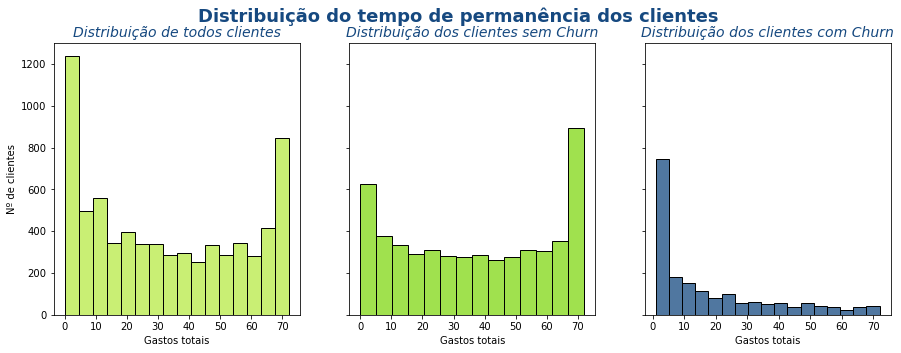

In [5]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5));
sns.histplot(data=dados, x='tempo_permanencia', ax=axes[0], color='#b7ea45')
axes[0].set_title('Distribuição de todos clientes', fontsize=14, color='#164980', style='italic')
axes[0].set_xlabel('Gastos totais')
axes[0].set_ylabel('Nº de clientes')

sns.histplot(data=dados.query('churn == 0'), x='tempo_permanencia', ax=axes[1], color='#81d712')
axes[1].set_title('Distribuição dos clientes sem Churn', fontsize=14, color='#164980', style='italic')
axes[1].set_xlabel('Gastos totais')

sns.histplot(data=dados.query('churn == 1'), x='tempo_permanencia', ax=axes[2], color='#164980')
axes[2].set_title('Distribuição dos clientes com Churn', fontsize=14, color='#164980', style='italic')
axes[2].set_xlabel('Gastos totais')

fig.suptitle('Distribuição do tempo de permanência dos clientes', fontsize=18, color='#164980', weight='bold');

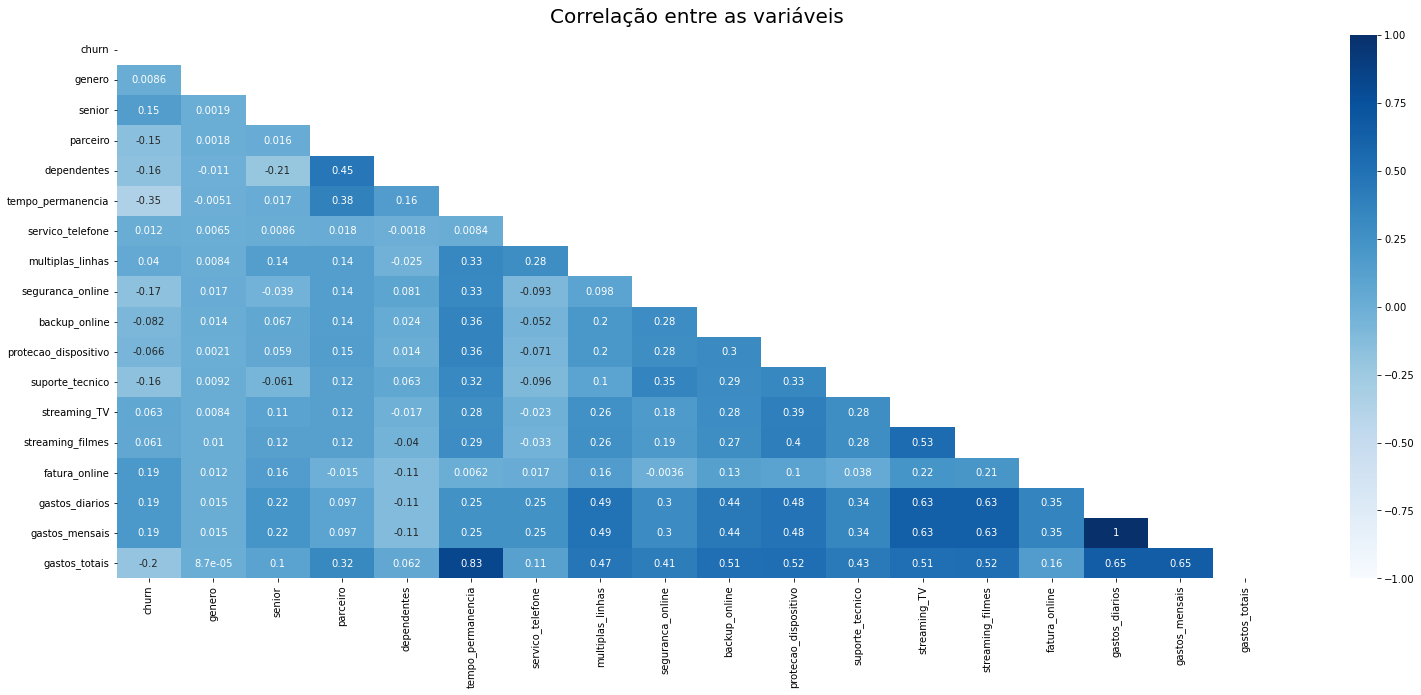

In [6]:
variaveis_correlacao = ['churn', 'genero', 'senior', 'parceiro', 'dependentes',
       'tempo_permanencia', 'servico_telefone', 'multiplas_linhas', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_TV',
       'streaming_filmes', 'fatura_online', 'gastos_diarios', 'gastos_mensais',
       'gastos_totais']

plt.figure(figsize=(26, 10))
mask = np.triu(np.ones_like(dados[variaveis_correlacao].corr(), dtype=bool))
ax = sns.heatmap(dados[variaveis_correlacao].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues', mask = mask)
ax.set_title('Correlação entre as variáveis', fontdict={'fontsize':20}, pad=12, color = 'black')
plt.show()

In [7]:
dados.columns

Index(['ID_cliente', 'churn', 'genero', 'senior', 'parceiro', 'dependentes',
       'tempo_permanencia', 'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_TV',
       'streaming_filmes', 'contrato', 'fatura_online', 'metodo_pagamento',
       'gastos_diarios', 'gastos_mensais', 'gastos_totais'],
      dtype='object')

In [21]:
clientes_churn = clientes_churn.drop('ID_cliente', axis=1)

In [31]:
clientes_churn.parceiro.unique()

array([0, 1], dtype=int64)

In [30]:
clientes_churn.head()

,churn,genero,senior,parceiro,dependentes,tempo_permanencia,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_TV,streaming_filmes,contrato,fatura_online,metodo_pagamento,gastos_diarios,gastos_mensais,gastos_totais
2,1,0,0,0,0,4,1,0,Fibra Óptica,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,2.463333,73.9,280.85
3,1,0,1,1,0,13,1,0,Fibra Óptica,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,3.266667,98.0,1237.85
4,1,1,1,1,0,3,1,0,Fibra Óptica,0,...,0,1,1,0,Mensal,1,Cheque,2.796667,83.9,267.40
18,1,0,1,0,0,45,1,0,DSL,1,...,1,0,0,1,Um ano,0,Cartão de crédito,2.090000,62.7,2791.50
19,1,0,1,0,0,1,0,0,DSL,0,...,0,0,0,0,Mensal,1,Cheque eletrônico,0.836667,25.1,25.10


In [70]:
f = lambda x: 0 if x == 'Não' else 1
clientes_churn['com_internet'] = clientes_churn.servico_internet.apply(f)

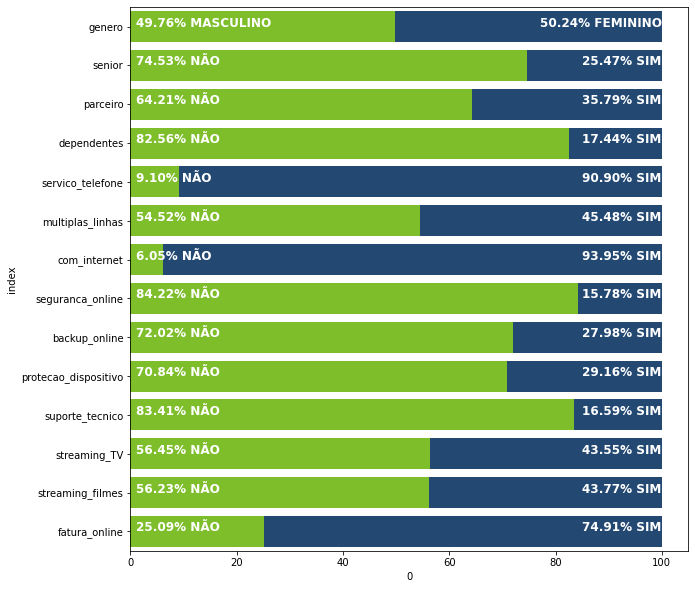

In [122]:
colunas_binarias = ['genero', 'senior', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas',
                    'com_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
                    'suporte_tecnico', 'streaming_TV', 'streaming_filmes', 'fatura_online']
counts = clientes_churn[colunas_binarias].apply(pd.Series.value_counts)
counts_T = counts.T
counts_T['soma'] = counts_T[0] + counts_T[1]
counts_T = counts_T.reset_index(level=0)
counts_T[0] /= counts_T['soma'] 
counts_T[1] /= counts_T['soma']
counts_T['soma'] = 1
counts_T[[0, 1, 'soma']] *= 100
map_genero = {0:'MASCULINO', 1:'FEMININO'}
map_nomes = {0:'NÃO', 1:'SIM'}

plt.figure(figsize=(10, 10))

fig = sns.barplot(x="soma", y="index", data=counts_T,
            label=False, color="#164980")

for i in range(len(counts_T)):
    if i == 0:
        text = f'{counts_T[1][i]:.2f}% {map_genero[1]}'
    else:
        text = f'{counts_T[1][i]:.2f}% {map_nomes[1]}'

    pos_x = 85
    if i == 0:
        pos_x = 77
    
    plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

fig2 = sns.barplot(x=0, y="index", data=counts_T,
            label=False, color="#81d712");


for i in range(len(counts_T)):
    if i == 0:
        text = f'{counts_T[0][i]:.2f}% {map_genero[0]}'
    else:
        text = f'{counts_T[0][i]:.2f}% {map_nomes[0]}'

    pos_x = 1
    
    plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

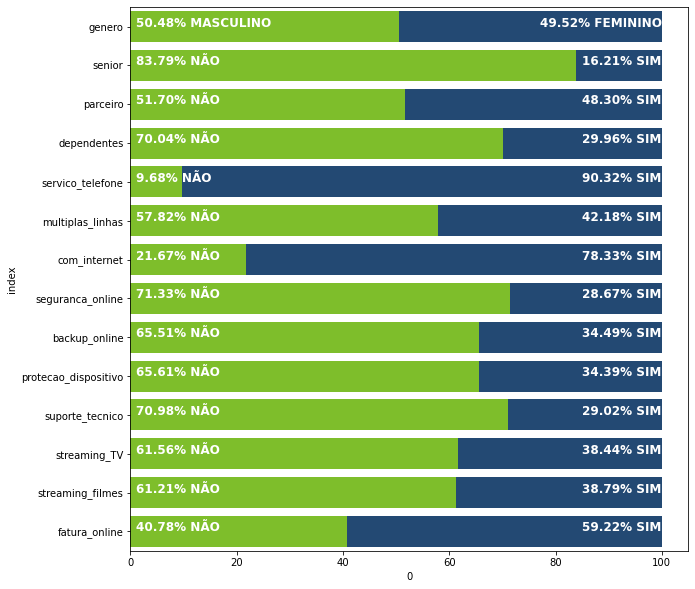

In [124]:
colunas_binarias = ['genero', 'senior', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas',
                    'com_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
                    'suporte_tecnico', 'streaming_TV', 'streaming_filmes', 'fatura_online']
f = lambda x: 0 if x == 'Não' else 1
dados['com_internet'] = dados.servico_internet.apply(f)
counts = dados[colunas_binarias].apply(pd.Series.value_counts)
counts_T = counts.T
counts_T['soma'] = counts_T[0] + counts_T[1]
counts_T = counts_T.reset_index(level=0)
counts_T[0] /= counts_T['soma'] 
counts_T[1] /= counts_T['soma']
counts_T['soma'] = 1
counts_T[[0, 1, 'soma']] *= 100
map_genero = {0:'MASCULINO', 1:'FEMININO'}
map_nomes = {0:'NÃO', 1:'SIM'}

plt.figure(figsize=(10, 10))

fig = sns.barplot(x="soma", y="index", data=counts_T,
            label=False, color="#164980")

for i in range(len(counts_T)):
    if i == 0:
        text = f'{counts_T[1][i]:.2f}% {map_genero[1]}'
    else:
        text = f'{counts_T[1][i]:.2f}% {map_nomes[1]}'

    pos_x = 85
    if i == 0:
        pos_x = 77
    
    plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

fig2 = sns.barplot(x=0, y="index", data=counts_T,
            label=False, color="#81d712");


for i in range(len(counts_T)):
    if i == 0:
        text = f'{counts_T[0][i]:.2f}% {map_genero[0]}'
    else:
        text = f'{counts_T[0][i]:.2f}% {map_nomes[0]}'

    pos_x = 1
    
    plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

<AxesSubplot:xlabel='count', ylabel='servico_internet'>

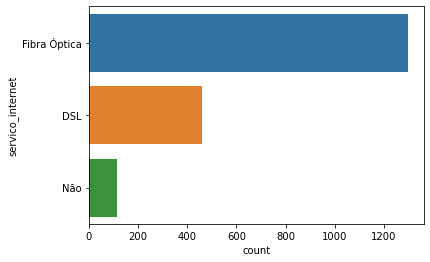

In [8]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='servico_internet', data=clientes_churn, orient='horizontal')

In [9]:
clientes_churn = dados.query('churn == 1')
# clientes_churn = dados.groupby('churn')

# sns.countplot(y='senior', data=clientes_churn, orient='horizontal')
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [10]:
clientes_churn = dados.query('churn == 1')
clientes_churn['dependentes'].value_counts()


# sns.barplot(y='dependentes', data=clientes_churn, orient='horizontal')

0    1543
1     326
Name: dependentes, dtype: int64

In [11]:
clientes_churn.columns

Index(['ID_cliente', 'churn', 'genero', 'senior', 'parceiro', 'dependentes',
       'tempo_permanencia', 'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_TV',
       'streaming_filmes', 'contrato', 'fatura_online', 'metodo_pagamento',
       'gastos_diarios', 'gastos_mensais', 'gastos_totais'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='servico_telefone'>

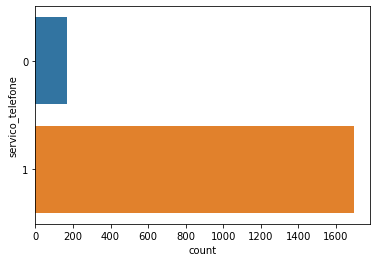

In [12]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='servico_telefone', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='contrato'>

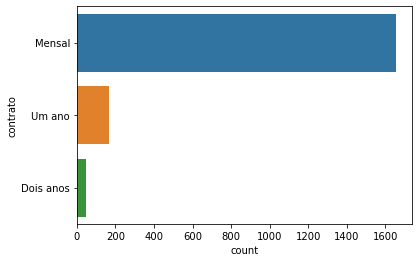

In [13]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='contrato', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='metodo_pagamento'>

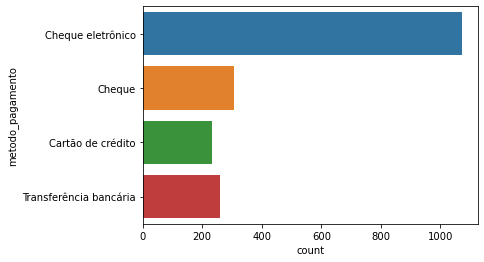

In [14]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='metodo_pagamento', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='seguranca_online'>

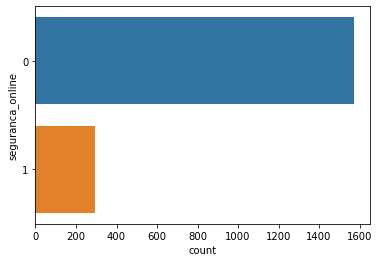

In [15]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='seguranca_online', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='backup_online'>

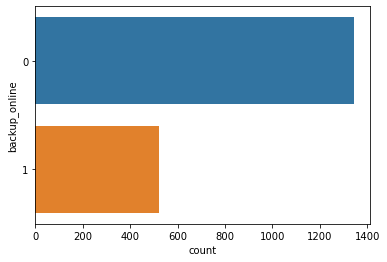

In [16]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='backup_online', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='protecao_dispositivo'>

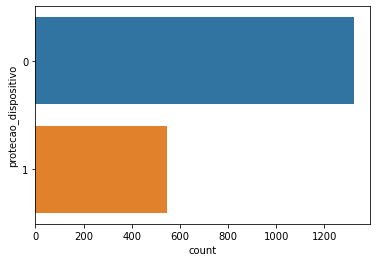

In [17]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='protecao_dispositivo', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='suporte_tecnico'>

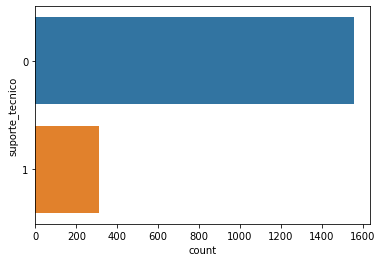

In [18]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='suporte_tecnico', data=clientes_churn, orient='horizontal')

<AxesSubplot:xlabel='count', ylabel='fatura_online'>

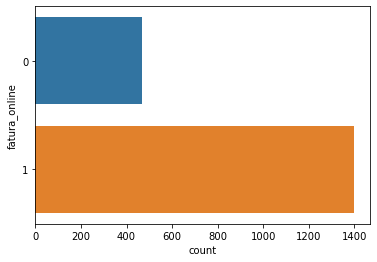

In [19]:
clientes_churn = dados.query('churn == 1')

sns.countplot(y='fatura_online', data=clientes_churn, orient='horizontal')